In [2]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

In [3]:
df_geo = gpd.read_file("/home/yoshraf/projects/mestrado/data/gis/od2017/Municipios_2017_region.shp")
df = pd.read_parquet("/home/yoshraf/projects/mestrado/data/processed/OD_2017.parquet")
df = df[["Identifica pessoa", "Coordenada X Origem", "Coordenada Y Origem"]]
df = df.dropna()

In [4]:
gdf_origin = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["Coordenada X Origem"], df["Coordenada Y Origem"]))
gdf_origin

,Identifica pessoa,Coordenada X Origem,Coordenada Y Origem,geometry
0,00010001101,333743.0,7394463.0,POINT (333743.000 7394463.000)
1,00010001101,333104.0,7394476.0,POINT (333104.000 7394476.000)
2,00010001102,333743.0,7394463.0,POINT (333743.000 7394463.000)
3,00010001102,327503.0,7392159.0,POINT (327503.000 7392159.000)
4,00010001102,329431.0,7395939.0,POINT (329431.000 7395939.000)
...,...,...,...,...
183087,05171418104,294735.0,7410561.0,POINT (294735.000 7410561.000)
183088,05171599101,295243.0,7411456.0,POINT (295243.000 7411456.000)
183089,05171599101,295327.0,7410920.0,POINT (295327.000 7410920.000)
183090,05171599102,295243.0,7411456.0,POINT (295243.000 7411456.000)


In [5]:
df_terminal = gpd.read_file("/home/yoshraf/projects/mestrado/data/gis/onibus_terminal/sad6996_terminal_onibus.shp")
df_terminal

,cd_identif,nm_termina,nm_tipo_te,tx_enderec,cd_tipo_te,geometry
0,3,Terminal Rodoviario Intermodal Barra Funda,RODOVIARIO,"R. Auro Soares De Moura Andrade, 664, Barra Funda",2,POINT (329740.637 7397297.965)
1,4,Term. Amaral Gurgel,URBANO,Ac A Rua Ana Cintra,1,POINT (331803.360 7395843.878)
2,5,Term. Aricanduva,URBANO,Av Aricanduva,1,POINT (341363.702 7397170.728)
3,6,Term. Bandeira,URBANO,Av Nove de Julho,1,POINT (332697.990 7394719.335)
4,7,Term. Capelinha,URBANO,Est de Itapecerica,1,POINT (320331.921 7382918.716)
5,9,Term. Casa Verde,URBANO,Av Eng. Caetano Alvares,1,POINT (330281.983 7400600.446)
6,10,Term. Cid. Tiradentes,URBANO,Av Metalurgicos,1,POINT (356345.153 7391240.984)
7,12,Term. Guarapiranga,URBANO,Est do M'Boi Mirim,1,POINT (323115.302 7381413.207)
8,16,Term. Lapa,URBANO,R Guaicurus,1,POINT (326459.805 7397879.046)
9,17,Term. Largo do Campo Limpo,URBANO,Est do Campo Limpo,1,POINT (319254.493 7385464.359)


In [6]:
gdf_sample = gdf_origin.sample(10, random_state=42)
buffer_sample = gdf_sample.buffer(2_500)

<AxesSubplot:>

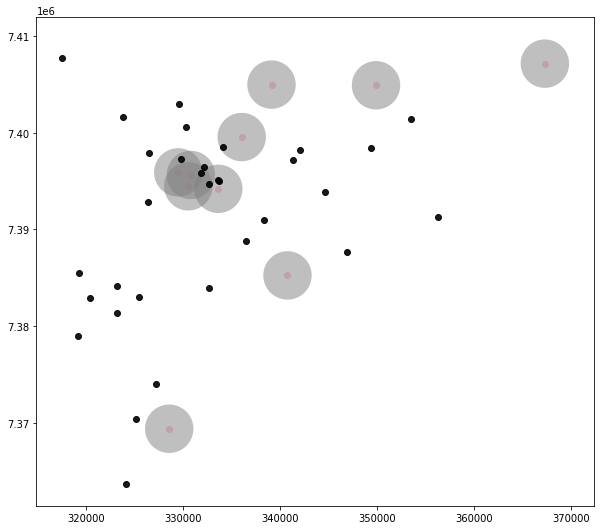

In [7]:
fig, ax = plt.subplots(1, figsize=(10,10))
gdf_sample.plot(ax= ax, color="pink", alpha=.90)
buffer_sample.plot(ax= ax, color="grey", alpha=.50)
df_terminal.plot(ax= ax, color="black", alpha=.90)

In [8]:
gdf_sample["buffer_geo"] = buffer_sample

In [9]:
gdf_sample

,Identifica pessoa,Coordenada X Origem,Coordenada Y Origem,geometry,buffer_geo
35827,00840811102,329487.0,7395895.0,POINT (329487.000 7395895.000),"POLYGON ((331987.000 7395895.000, 331974.962 7..."
35352,00840138101,333619.0,7394199.0,POINT (333619.000 7394199.000),"POLYGON ((336119.000 7394199.000, 336106.962 7..."
11292,00321738101,330520.0,7394459.0,POINT (330520.000 7394459.000),"POLYGON ((333020.000 7394459.000, 333007.962 7..."
105153,02950047102,328551.0,7369428.0,POINT (328551.000 7369428.000),"POLYGON ((331051.000 7369428.000, 331038.962 7..."
148430,04191953102,340761.0,7385258.0,POINT (340761.000 7385258.000),"POLYGON ((343261.000 7385258.000, 343248.962 7..."
60469,01551523104,339112.0,7404961.0,POINT (339112.000 7404961.000),"POLYGON ((341612.000 7404961.000, 341599.962 7..."
130429,03640796101,349904.0,7404889.0,POINT (349904.000 7404889.000),"POLYGON ((352404.000 7404889.000, 352391.962 7..."
63055,01650040103,336035.0,7399544.0,POINT (336035.000 7399544.000),"POLYGON ((338535.000 7399544.000, 338522.962 7..."
9872,00300641101,330781.0,7395631.0,POINT (330781.000 7395631.000),"POLYGON ((333281.000 7395631.000, 333268.962 7..."
140612,03980343102,367337.0,7407126.0,POINT (367337.000 7407126.000),"POLYGON ((369837.000 7407126.000, 369824.962 7..."


In [10]:
gdf_sample.drop(columns=["geometry"]).rename(columns = {"buffer_geo": "geometry"})

,Identifica pessoa,Coordenada X Origem,Coordenada Y Origem,geometry
35827,00840811102,329487.0,7395895.0,"POLYGON ((331987.000 7395895.000, 331974.962 7..."
35352,00840138101,333619.0,7394199.0,"POLYGON ((336119.000 7394199.000, 336106.962 7..."
11292,00321738101,330520.0,7394459.0,"POLYGON ((333020.000 7394459.000, 333007.962 7..."
105153,02950047102,328551.0,7369428.0,"POLYGON ((331051.000 7369428.000, 331038.962 7..."
148430,04191953102,340761.0,7385258.0,"POLYGON ((343261.000 7385258.000, 343248.962 7..."
60469,01551523104,339112.0,7404961.0,"POLYGON ((341612.000 7404961.000, 341599.962 7..."
130429,03640796101,349904.0,7404889.0,"POLYGON ((352404.000 7404889.000, 352391.962 7..."
63055,01650040103,336035.0,7399544.0,"POLYGON ((338535.000 7399544.000, 338522.962 7..."
9872,00300641101,330781.0,7395631.0,"POLYGON ((333281.000 7395631.000, 333268.962 7..."
140612,03980343102,367337.0,7407126.0,"POLYGON ((369837.000 7407126.000, 369824.962 7..."


In [11]:
def prep_to_join(gdf, col):
    return gdf.drop(columns=["geometry"]).rename(columns = {col: "geometry"})

prep_to_join(gdf_sample, "buffer_geo")

,Identifica pessoa,Coordenada X Origem,Coordenada Y Origem,geometry
35827,00840811102,329487.0,7395895.0,"POLYGON ((331987.000 7395895.000, 331974.962 7..."
35352,00840138101,333619.0,7394199.0,"POLYGON ((336119.000 7394199.000, 336106.962 7..."
11292,00321738101,330520.0,7394459.0,"POLYGON ((333020.000 7394459.000, 333007.962 7..."
105153,02950047102,328551.0,7369428.0,"POLYGON ((331051.000 7369428.000, 331038.962 7..."
148430,04191953102,340761.0,7385258.0,"POLYGON ((343261.000 7385258.000, 343248.962 7..."
60469,01551523104,339112.0,7404961.0,"POLYGON ((341612.000 7404961.000, 341599.962 7..."
130429,03640796101,349904.0,7404889.0,"POLYGON ((352404.000 7404889.000, 352391.962 7..."
63055,01650040103,336035.0,7399544.0,"POLYGON ((338535.000 7399544.000, 338522.962 7..."
9872,00300641101,330781.0,7395631.0,"POLYGON ((333281.000 7395631.000, 333268.962 7..."
140612,03980343102,367337.0,7407126.0,"POLYGON ((369837.000 7407126.000, 369824.962 7..."


In [13]:
print(prep_to_join(gdf_sample,"buffer_geo").columns)

Index(['Identifica pessoa', 'Coordenada X Origem', 'Coordenada Y Origem',
       'geometry'],
      dtype='object')


In [14]:
print(df_terminal.columns)

Index(['cd_identif', 'nm_termina', 'nm_tipo_te', 'tx_enderec', 'cd_tipo_te',
       'geometry'],
      dtype='object')


In [11]:
gpd_join = gpd.sjoin(prep_to_join(gdf_sample, "buffer_geo"), df_terminal, how="left", op='intersects')
gpd_join

,Identifica pessoa,Coordenada X Origem,Coordenada Y Origem,geometry,index_right,cd_identif,nm_termina,nm_tipo_te,tx_enderec,cd_tipo_te
35827,00840811102,329487.0,7395895.0,"POLYGON ((331987.000 7395895.000, 331974.962 7...",0.0,3.0,Terminal Rodoviario Intermodal Barra Funda,RODOVIARIO,"R. Auro Soares De Moura Andrade, 664, Barra Funda",2
35827,00840811102,329487.0,7395895.0,"POLYGON ((331987.000 7395895.000, 331974.962 7...",1.0,4.0,Term. Amaral Gurgel,URBANO,Ac A Rua Ana Cintra,1
35352,00840138101,333619.0,7394199.0,"POLYGON ((336119.000 7394199.000, 336106.962 7...",1.0,4.0,Term. Amaral Gurgel,URBANO,Ac A Rua Ana Cintra,1
35352,00840138101,333619.0,7394199.0,"POLYGON ((336119.000 7394199.000, 336106.962 7...",3.0,6.0,Term. Bandeira,URBANO,Av Nove de Julho,1
35352,00840138101,333619.0,7394199.0,"POLYGON ((336119.000 7394199.000, 336106.962 7...",11.0,19.0,Term. Parque D. Pedro II,URBANO,Av do Estado,1
35352,00840138101,333619.0,7394199.0,"POLYGON ((336119.000 7394199.000, 336106.962 7...",19.0,29.0,Term. Mercado,URBANO,Av do Estado,1
11292,00321738101,330520.0,7394459.0,"POLYGON ((333020.000 7394459.000, 333007.962 7...",1.0,4.0,Term. Amaral Gurgel,URBANO,Ac A Rua Ana Cintra,1
11292,00321738101,330520.0,7394459.0,"POLYGON ((333020.000 7394459.000, 333007.962 7...",3.0,6.0,Term. Bandeira,URBANO,Av Nove de Julho,1
105153,02950047102,328551.0,7369428.0,"POLYGON ((331051.000 7369428.000, 331038.962 7...",NaN,NaN,NaN,NaN,NaN,NaN
148430,04191953102,340761.0,7385258.0,"POLYGON ((343261.000 7385258.000, 343248.962 7...",NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
gpd_join_aux = gpd_join[["Identifica pessoa", "nm_termina"]].fillna(0)
gpd_join_aux["flag"] = gpd_join_aux["nm_termina"].apply(lambda x: 1 if x != 0 else 0)
df_join_aux = pd.DataFrame(gpd_join_aux.groupby(["Identifica pessoa"])["flag"].sum())

In [13]:
df_final = gdf_sample.set_index("Identifica pessoa").merge(df_join_aux, on="Identifica pessoa")

In [14]:
gdf_sample

,Identifica pessoa,Coordenada X Origem,Coordenada Y Origem,geometry,buffer_geo
35827,00840811102,329487.0,7395895.0,POINT (329487.000 7395895.000),"POLYGON ((331987.000 7395895.000, 331974.962 7..."
35352,00840138101,333619.0,7394199.0,POINT (333619.000 7394199.000),"POLYGON ((336119.000 7394199.000, 336106.962 7..."
11292,00321738101,330520.0,7394459.0,POINT (330520.000 7394459.000),"POLYGON ((333020.000 7394459.000, 333007.962 7..."
105153,02950047102,328551.0,7369428.0,POINT (328551.000 7369428.000),"POLYGON ((331051.000 7369428.000, 331038.962 7..."
148430,04191953102,340761.0,7385258.0,POINT (340761.000 7385258.000),"POLYGON ((343261.000 7385258.000, 343248.962 7..."
60469,01551523104,339112.0,7404961.0,POINT (339112.000 7404961.000),"POLYGON ((341612.000 7404961.000, 341599.962 7..."
130429,03640796101,349904.0,7404889.0,POINT (349904.000 7404889.000),"POLYGON ((352404.000 7404889.000, 352391.962 7..."
63055,01650040103,336035.0,7399544.0,POINT (336035.000 7399544.000),"POLYGON ((338535.000 7399544.000, 338522.962 7..."
9872,00300641101,330781.0,7395631.0,POINT (330781.000 7395631.000),"POLYGON ((333281.000 7395631.000, 333268.962 7..."
140612,03980343102,367337.0,7407126.0,POINT (367337.000 7407126.000),"POLYGON ((369837.000 7407126.000, 369824.962 7..."


In [16]:
df_final

,Coordenada X Origem,Coordenada Y Origem,geometry,buffer_geo,flag
Identifica pessoa,,,,,
00840811102,329487.0,7395895.0,POINT (329487.000 7395895.000),"POLYGON ((331987.000 7395895.000, 331974.962 7...",2
00840138101,333619.0,7394199.0,POINT (333619.000 7394199.000),"POLYGON ((336119.000 7394199.000, 336106.962 7...",4
00321738101,330520.0,7394459.0,POINT (330520.000 7394459.000),"POLYGON ((333020.000 7394459.000, 333007.962 7...",2
02950047102,328551.0,7369428.0,POINT (328551.000 7369428.000),"POLYGON ((331051.000 7369428.000, 331038.962 7...",0
04191953102,340761.0,7385258.0,POINT (340761.000 7385258.000),"POLYGON ((343261.000 7385258.000, 343248.962 7...",0
01551523104,339112.0,7404961.0,POINT (339112.000 7404961.000),"POLYGON ((341612.000 7404961.000, 341599.962 7...",0
03640796101,349904.0,7404889.0,POINT (349904.000 7404889.000),"POLYGON ((352404.000 7404889.000, 352391.962 7...",0
01650040103,336035.0,7399544.0,POINT (336035.000 7399544.000),"POLYGON ((338535.000 7399544.000, 338522.962 7...",1
00300641101,330781.0,7395631.0,POINT (330781.000 7395631.000),"POLYGON ((333281.000 7395631.000, 333268.962 7...",4


<AxesSubplot:>

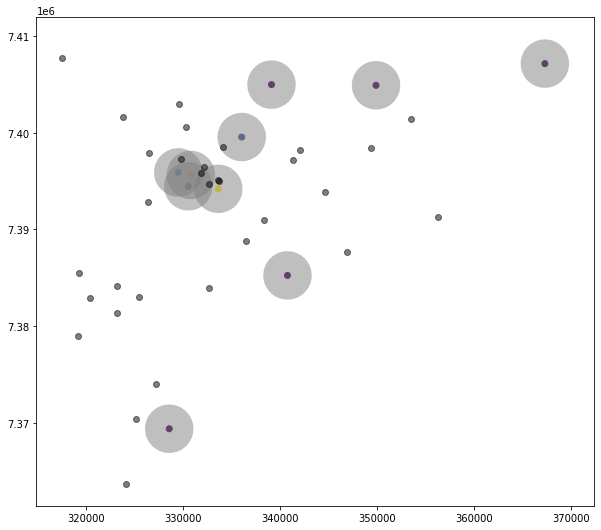

In [19]:
fig, ax = plt.subplots(1, figsize=(10,10))
df_final.plot(ax= ax, column = "flag")
buffer_sample.plot(ax= ax, color="grey", alpha=.50)
df_terminal.plot(ax= ax, color="black", alpha=.50)

In [25]:
from typing import Any

import geopandas as gpd
import pandas as pd
from geopandas.geodataframe import GeoDataFrame
from pandas.core.frame import DataFrame
from shapely.geometry import Point
from shapely.ops import nearest_points

def geo_prep_to_join(gdf: GeoDataFrame, col: str) -> GeoDataFrame:
    '''Operação necessária quando deseja-se realizar uma intersecção

    Um GeoDataFrame só [TODO]
    '''
    return gdf.drop(columns=["geometry"]).rename(columns={col: "geometry"})

def get_counting(gdf: GeoDataFrame, gdf_ref: GeoDataFrame, buffer: int, col: str, idx: list, col_return : str = "count") -> GeoDataFrame:
    '''
    Dado um 'gdf' contendo POINTS, cria-se um buffer cuja intersecção com 'gdf_ref'
    realiza-se contagem

    Nota: A 'col' não pode conter zero
    Nota2: Buffer é uma distância em metros
    '''
    gdf["buffer_geo"] = gdf.buffer(buffer)
    # Intersecção entre o buffer
    gpd_join = gpd.sjoin(geo_prep_to_join(gdf, "buffer_geo"),
                         gdf_ref, how="left", op='intersects')
    gpd_join[col] = gpd_join[col].fillna('NOTFOUND')
    gpd_join[col_return] = gpd_join[col].apply(lambda x: 1 if x != 'NOTFOUND' else 0)
    df_join_aux = pd.DataFrame(gpd_join.groupby(idx)[col_return].sum())
    return gdf.set_index(idx).merge(df_join_aux, on=idx).reset_index()

gdf_sample = gdf_origin.sample(10, random_state=42)
get_counting(gdf_sample, df_terminal, 2_500, "nm_termina", ["Identifica pessoa"])

,Identifica pessoa,Coordenada X Origem,Coordenada Y Origem,geometry,buffer_geo,count
0,00840811102,329487.0,7395895.0,POINT (329487.000 7395895.000),"POLYGON ((331987.000 7395895.000, 331974.962 7...",2
1,00840138101,333619.0,7394199.0,POINT (333619.000 7394199.000),"POLYGON ((336119.000 7394199.000, 336106.962 7...",4
2,00321738101,330520.0,7394459.0,POINT (330520.000 7394459.000),"POLYGON ((333020.000 7394459.000, 333007.962 7...",2
3,02950047102,328551.0,7369428.0,POINT (328551.000 7369428.000),"POLYGON ((331051.000 7369428.000, 331038.962 7...",0
4,04191953102,340761.0,7385258.0,POINT (340761.000 7385258.000),"POLYGON ((343261.000 7385258.000, 343248.962 7...",0
5,01551523104,339112.0,7404961.0,POINT (339112.000 7404961.000),"POLYGON ((341612.000 7404961.000, 341599.962 7...",0
6,03640796101,349904.0,7404889.0,POINT (349904.000 7404889.000),"POLYGON ((352404.000 7404889.000, 352391.962 7...",0
7,01650040103,336035.0,7399544.0,POINT (336035.000 7399544.000),"POLYGON ((338535.000 7399544.000, 338522.962 7...",1
8,00300641101,330781.0,7395631.0,POINT (330781.000 7395631.000),"POLYGON ((333281.000 7395631.000, 333268.962 7...",4
9,03980343102,367337.0,7407126.0,POINT (367337.000 7407126.000),"POLYGON ((369837.000 7407126.000, 369824.962 7...",0


In [19]:
gdf_sample

,Identifica pessoa,Coordenada X Origem,Coordenada Y Origem,geometry
35827,00840811102,329487.0,7395895.0,POINT (329487.000 7395895.000)
35352,00840138101,333619.0,7394199.0,POINT (333619.000 7394199.000)
11292,00321738101,330520.0,7394459.0,POINT (330520.000 7394459.000)
105153,02950047102,328551.0,7369428.0,POINT (328551.000 7369428.000)
148430,04191953102,340761.0,7385258.0,POINT (340761.000 7385258.000)
60469,01551523104,339112.0,7404961.0,POINT (339112.000 7404961.000)
130429,03640796101,349904.0,7404889.0,POINT (349904.000 7404889.000)
63055,01650040103,336035.0,7399544.0,POINT (336035.000 7399544.000)
9872,00300641101,330781.0,7395631.0,POINT (330781.000 7395631.000)
140612,03980343102,367337.0,7407126.0,POINT (367337.000 7407126.000)
